

# Project: Investigate a Dataset  [No Show Appointments]
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction ☑

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela . Data Content is 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

> For More Information about Dataset : https://www.kaggle.com/joniarroba/noshowappointments



 ## Data Columns ⚡
> 1. PatientId : Identification of a patient
2. AppointmentID : Identification of each appointment
3. Gender : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. -DataMarcacaoConsulta : The day of the actuall appointment, when they have to visit the doctor.
5. DataAgendamento : The day someone called or registered the appointment, this is before appointment of course.
6.  Age : How old is the patient.
7.  Neighbourhood : Where the appointment takes place.
8. Scholarship : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9.  Hipertension : True or False
10. Diabetes : True or False
11.  Alcoholism : True or False
12. Handcap : True or False
13. SMS_received : 1 or more messages sent to the patient.
14. No-show : True or False.

## Questions For Analysis ☯
>1.   Q1 : Does People Show-Up or No-Show to Appointments ?
2.   Q2 : Does Males Showed up to Appointments more than Females ?
3.   Q3 : What is Age Average for Diseases ?
4.   Q4 : Who is more Alcoholism , Males or Females ?
5.   Q5 : How Many Waiting Days for Appointments in the Most ?
6.   Q6 : What is Average of Waiting Days for Patients with Chronic Diseases  ?
7.   Q7 : Are Patients with Scholarship eager to Show up to Appointments  ?
8.  Q8 : Is there Relation between Receiving SMS and Showing up to Appointments ?
9.  Q9 : What is Age of Patients who Shown up to Appointments ?
10. Q10 :  What are the Five Most Neighborhoods where Patients are Shown up to Appointments ?
11. Q11 : Did Day affect on Showing up to Appointments ?

## Import Libraries ♦

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)

<a id='wrangling'></a>
# Data Wrangling ⛔
1. Accessing Data
2. Data Cleaning

## Accessing Data ✴

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.sample(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
17271,3.415817e+14,5651507,F,2016-05-03T08:55:26Z,2016-05-11T00:00:00Z,45,SÃO PEDRO,0,0,0,0,0,1,No
49817,9.356935e+12,5565023,M,2016-04-11T08:23:15Z,2016-05-04T00:00:00Z,25,JARDIM DA PENHA,0,0,0,0,0,1,No
25458,7.522369e+12,5672010,M,2016-05-09T07:31:16Z,2016-05-09T00:00:00Z,55,CARATOÍRA,0,1,1,1,0,0,No
3448,3.191761e+12,5680041,M,2016-05-10T11:00:02Z,2016-05-16T00:00:00Z,6,RESISTÊNCIA,0,0,0,0,0,0,Yes
97327,9.577218e+13,5747977,M,2016-05-30T16:46:28Z,2016-06-03T00:00:00Z,53,MARUÍPE,0,0,0,0,0,1,No
43845,9.486638e+13,5641678,F,2016-04-29T14:07:49Z,2016-05-13T00:00:00Z,1,CONSOLAÇÃO,0,0,0,0,0,0,Yes


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
for col in df.columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(df[col].unique())
  print('-'*100)


Unique Values in PatientId Column
----------------------------------------------------------------------------------------------------
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
----------------------------------------------------------------------------------------------------
Unique Values in AppointmentID Column
----------------------------------------------------------------------------------------------------
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
----------------------------------------------------------------------------------------------------
Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['F' 'M']
----------------------------------------------------------------------------------------------------
Unique Values in ScheduledDay Column
---------------------------------------------------------------------------------------------

## Data Cleaning ♾
1. Checking Duplicated Rows or Columns
2. Renaming Columns
3. Converting  datatype of ScheduledDay  and AppointmentDay Columns to datatype of datatime
4. Creating Features as hours , days , months and hours from ScheduledDay and AppointmentDay Columns 
5. Handling Values in Handcap Column
6. Handling Values in age Column
7. Handling 0,1 values to Yes and No
5. Removing unneeded Columns

###  Checking Duplicated Rows or Columns

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Renaming Columns

In [ ]:
df.rename(columns={ 'ScheduledDay':'Scheduled_Date',
            'AppointmentDay':'Appointment_Date',
            'No-show':'No_show',
            'Handcap':'Handicap'},inplace = True)
df

,PatientId,AppointmentID,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Converting datatype of ScheduledDay and AppointmentDay Columns to datatype of datatime

In [ ]:
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         110527 non-null  float64            
 1   AppointmentID     110527 non-null  int64              
 2   Gender            110527 non-null  object             
 3   Scheduled_Date    110527 non-null  datetime64[ns, UTC]
 4   Appointment_Date  110527 non-null  datetime64[ns, UTC]
 5   Age               110527 non-null  int64              
 6   Neighbourhood     110527 non-null  object             
 7   Scholarship       110527 non-null  int64              
 8   Hipertension      110527 non-null  int64              
 9   Diabetes          110527 non-null  int64              
 10  Alcoholism        110527 non-null  int64              
 11  Handicap          110527 non-null  int64              
 12  SMS_received      110527 non-null  int64    

### Creating Features as hours , days , months and hours from Scheduled_Date and Appointment_Date Columns 

In [ ]:
df['Scheduled_Month_Name'] = df['Scheduled_Date'].dt.month_name()
df['Scheduled_Day'] = df['Scheduled_Date'].dt.day
df['Scheduled_Day_Name'] = df['Scheduled_Date'].dt.day_name()
df['Scheduled_Hour'] = df['Scheduled_Date'].dt.hour

In [ ]:
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'].dt.date)

In [ ]:
df['Appointment_Month_Name'] = df['Appointment_Date'].dt.month_name()
df['Appointment_Day'] = df['Appointment_Date'].dt.day
df['Appointment_Day_Name'] = df['Appointment_Date'].dt.day_name()
df['Appointment_Hour'] = df['Appointment_Date'].dt.hour

In [ ]:
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'].dt.date)

In [ ]:
df['Waiting_Days'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days

In [ ]:
df['Waiting_Days'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

In [ ]:
np.sort(df['Waiting_Days'].unique())

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179])

there're error in 5 waiting days as they've negative values

In [ ]:
df['Waiting_Days'].value_counts().sort_index().head(5)

-6        1
-1        4
 0    38563
 1     5213
 2     6725
Name: Waiting_Days, dtype: int64

In [ ]:
# Dropping this 5 rows
df.drop(df[df['Waiting_Days']<0].index,inplace= True)

### Handling Values in Handcap Column

In [ ]:
df['Handicap'].value_counts()

0    108283
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [ ]:
df['Handicap'] = df['Handicap'].apply(lambda value : 1 if value>0  else 0 )

In [ ]:
df['Handicap'].value_counts()

0    108283
1      2239
Name: Handicap, dtype: int64

### Handling Values in Age Column

In [ ]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [ ]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [ ]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No_show,Scheduled_Month_Name,Scheduled_Day,Scheduled_Day_Name,Scheduled_Hour,Appointment_Month_Name,Appointment_Day,Appointment_Day_Name,Appointment_Hour,Waiting_Days
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,...,No,June,6,Monday,8,June,6,Monday,0,0


there is one error in age value as it's negative values

In [ ]:
# Dropping this  row
df.drop(df[df['Age']==-1].index,inplace= True)

### Handling 0,1 values to Yes and No

In [ ]:
dict_yes_no = {
    0 : 'No',
    1 : 'Yes' }
col_handled  = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handicap','SMS_received']    
for col in col_handled :
   df[col] = df[col].map(dict_yes_no)

In [ ]:
for col in df.columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(df[col].unique())
  print('-'*100)

Unique Values in PatientId Column
----------------------------------------------------------------------------------------------------
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
----------------------------------------------------------------------------------------------------
Unique Values in AppointmentID Column
----------------------------------------------------------------------------------------------------
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
----------------------------------------------------------------------------------------------------
Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['F' 'M']
----------------------------------------------------------------------------------------------------
Unique Values in Scheduled_Date Column
-------------------------------------------------------------------------------------------

In [ ]:
df

,PatientId,AppointmentID,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No_show,Scheduled_Month_Name,Scheduled_Day,Scheduled_Day_Name,Scheduled_Hour,Appointment_Month_Name,Appointment_Day,Appointment_Day_Name,Appointment_Hour,Waiting_Days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,...,No,April,29,Friday,18,April,29,Friday,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,...,No,April,29,Friday,16,April,29,Friday,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,...,No,April,29,Friday,16,April,29,Friday,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,...,No,April,29,Friday,17,April,29,Friday,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,...,No,April,29,Friday,16,April,29,Friday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,No,No,No,...,No,May,3,Tuesday,9,June,7,Tuesday,0,35
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,No,No,No,...,No,May,3,Tuesday,7,June,7,Tuesday,0,35
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,No,No,No,...,No,April,27,Wednesday,16,June,7,Tuesday,0,41
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,No,No,No,...,No,April,27,Wednesday,15,June,7,Tuesday,0,41


### Removing uneeded Columns

In [ ]:
# Dropping uneeded Columns
df.drop(columns=['PatientId','AppointmentID'],axis = 1 , inplace = True)

In [ ]:
df

,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,...,No_show,Scheduled_Month_Name,Scheduled_Day,Scheduled_Day_Name,Scheduled_Hour,Appointment_Month_Name,Appointment_Day,Appointment_Day_Name,Appointment_Hour,Waiting_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,...,No,April,29,Friday,18,April,29,Friday,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,...,No,April,29,Friday,16,April,29,Friday,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,...,No,April,29,Friday,16,April,29,Friday,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,...,No,April,29,Friday,17,April,29,Friday,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,...,No,April,29,Friday,16,April,29,Friday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,No,No,No,No,No,...,No,May,3,Tuesday,9,June,7,Tuesday,0,35
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,No,No,No,No,No,...,No,May,3,Tuesday,7,June,7,Tuesday,0,35
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,No,No,No,No,No,...,No,April,27,Wednesday,16,June,7,Tuesday,0,41
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,No,No,No,No,No,...,No,April,27,Wednesday,15,June,7,Tuesday,0,41


<a id='eda'></a>
#Exploratory Data Analysis ⛲



### Does People Show-Up or No-Show to  Appointments ?

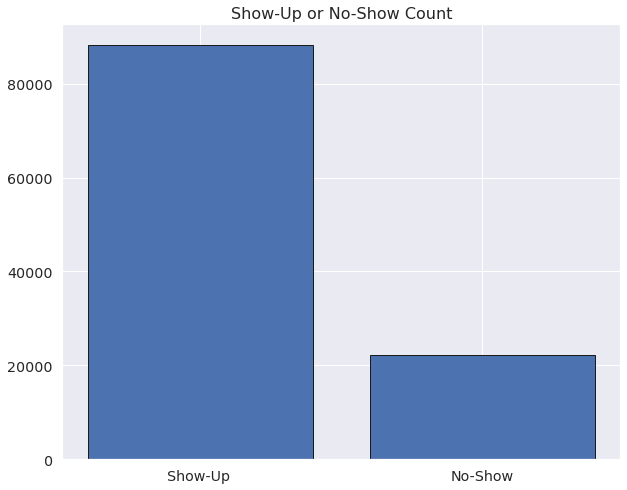

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}, font_scale=1.3)
plt.bar(['Show-Up ' ,'No-Show'],df['No_show'].value_counts(),facecolor = 'b',edgecolor='k')
plt.title('Show-Up or No-Show Count',size = 16)
plt.show()

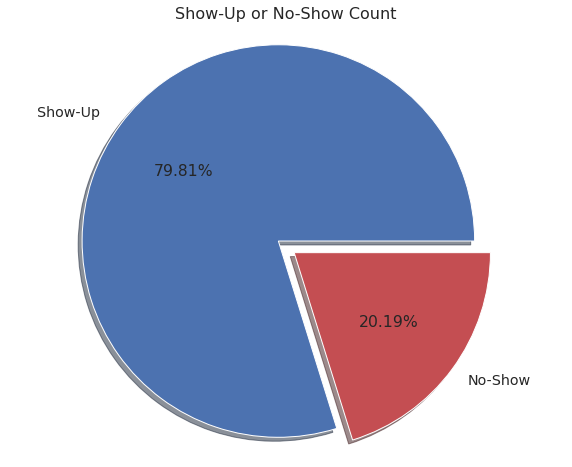

In [ ]:
plt.pie(df['No_show'].value_counts(),labels=['Show-Up ' ,'No-Show'],
        shadow= True, autopct='%.2f%%', colors =['b','r'], explode = [0.1,0])
plt.title('Show-Up or No-Show Count',size = 16)
plt.axis ('equal')
plt.show()

**Conclusion :** Most of patient people has been showed up to appointments 

### Does Males Showed up to Appointments more than Females ?

In [ ]:
showed = df[df['No_show']=='No']
un_showed = df[df['No_show']=='Yes']

In [ ]:
un_showed['Gender']

6         F
7         F
11        M
17        F
20        F
         ..
110484    F
110492    M
110496    F
110515    M
110516    F
Name: Gender, Length: 22314, dtype: object

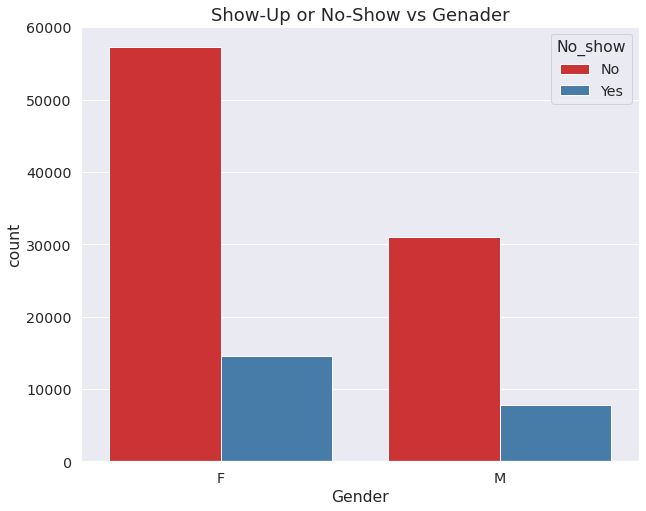

In [ ]:
sns.countplot(x=df['Gender'],hue=df['No_show'],palette='rocket')
plt.title('Show-Up or No-Show vs Genader',size = 18)
plt.show()

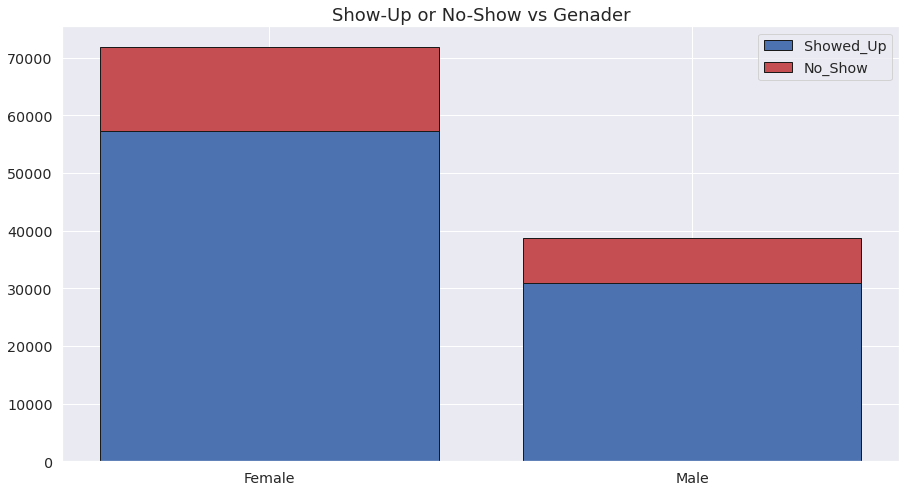

In [ ]:
labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, showed['Gender'].value_counts(), label='Showed_Up'
                       ,facecolor ='b',edgecolor='k')
ax.bar(labels, un_showed['Gender'].value_counts(), bottom=showed['Gender'].value_counts(),
       label="No_Show",facecolor ='r',edgecolor='k')
plt.title('Show-Up or No-Show vs Genader',size = 18)
ax.legend()


**Conclusion :**  Patients Females have been shown up to appointments   more than  Patients Males

### What is Age Average for Diseases ? 
>  Age Average for Diseases as Chronic diseases  (diabetes and hypertension) and Handicaps for Males and Females

#### Diabetes

In [ ]:
df.groupby(['Diabetes']).mean()['Age']

Diabetes
No     35.209051
Yes    61.372529
Name: Age, dtype: float64

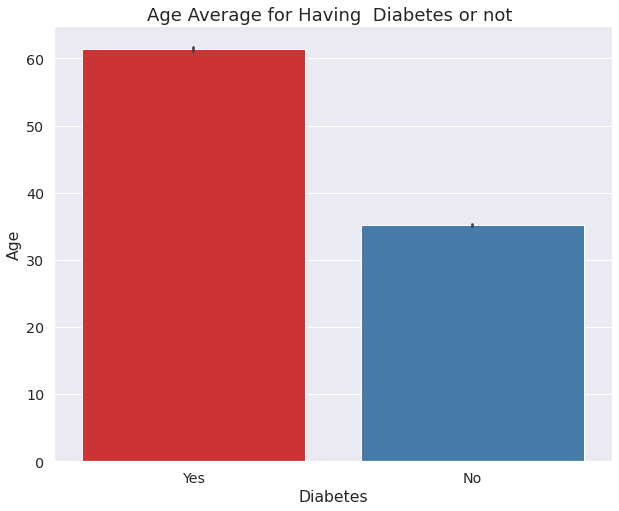

In [ ]:
sns.barplot(x=df['Diabetes'],y =df['Age'],order=['Yes','No'],palette='Set1')
plt.title('Age Average for Having  Diabetes or not ',size = 18)
plt.show()

In [ ]:
pd.pivot_table(df, values ='Age',index='Gender', columns='Diabetes')

Diabetes,No,Yes
Gender,,
F,36.988857,61.407599
M,31.966050,61.288404


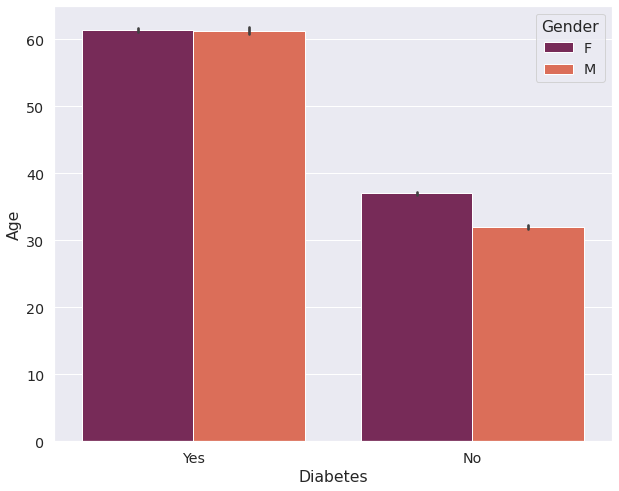

In [ ]:
sns.barplot(x=df['Diabetes'],y =df['Age'],order=['Yes','No'],palette='rocket',hue=df['Gender'])
plt.show()

#### Hipertension

In [ ]:
df.groupby(['Hipertension']).mean()['Age']

Hipertension
No     31.308826
Yes    60.613596
Name: Age, dtype: float64

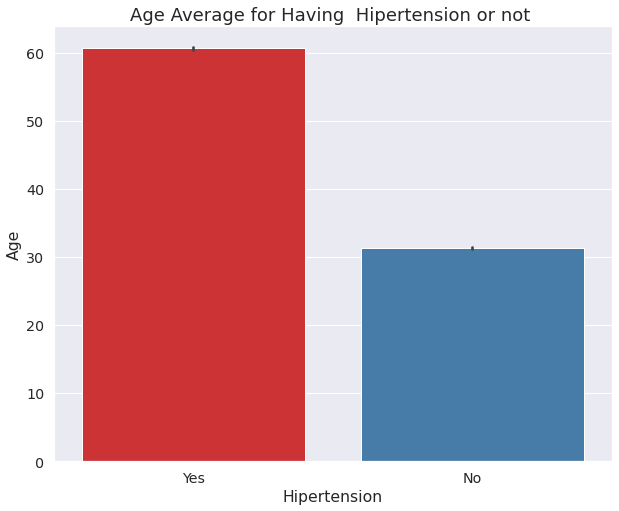

In [ ]:
sns.barplot(x=df['Hipertension'],y =df['Age'],order=['Yes','No'],palette='Set1')
plt.title('Age Average for Having  Hipertension or not ',size = 18)
plt.show()

In [ ]:
pd.pivot_table(df, values ='Age',index='Gender', columns='Hipertension')

Hipertension,No,Yes
Gender,,
F,33.030479,60.492861
M,28.290227,60.900186


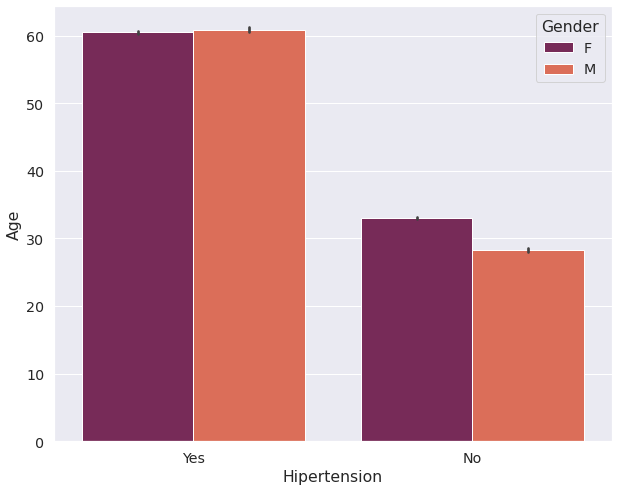

In [ ]:
sns.barplot(x=df['Hipertension'],y =df['Age'],order=['Yes','No'],palette='rocket',hue=df['Gender'])

#### Handicap

In [ ]:
df.groupby(['Handicap']).mean()['Age']

Handicap
No     36.810818
Yes    50.561411
Name: Age, dtype: float64

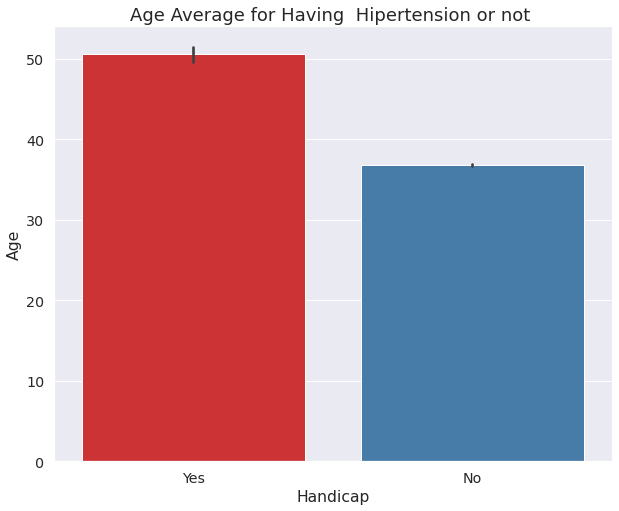

In [ ]:
sns.barplot(x=df['Handicap'],y =df['Age'],order=['Yes','No'],palette='Set1')
plt.title('Age Average for Having  Hipertension or not ',size = 18)
plt.show()

In [ ]:
pd.pivot_table(df, values ='Age',index='Gender', columns='Handicap')

Handicap,No,Yes
Gender,,
F,38.650942,52.222653
M,33.370637,48.307368


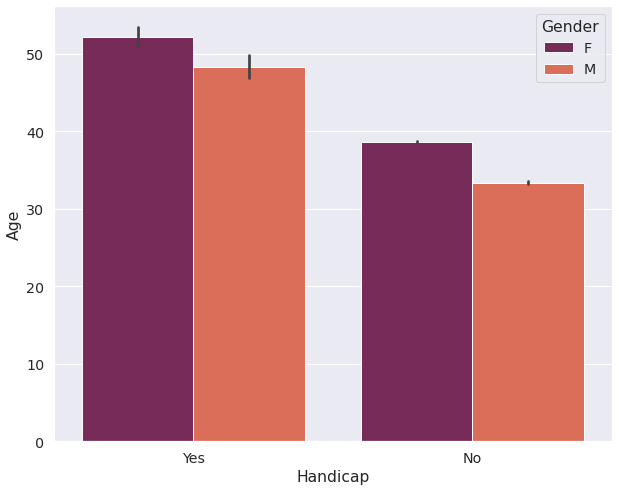

In [ ]:
sns.barplot(x=df['Handicap'],y =df['Age'],order=['Yes','No'],palette='rocket',hue=df['Gender'])

**Conclusions** : 
1. The average age of male Diabetics is equal to the average age of female Diabetics
2. The average age of male Hipertension is equal to the average age of female  Hipertension
3.  The average age of male Handicaps is less than to the average age of female  Handicaps


### Who is more Alcoholism , Males or Females ?

In [ ]:
Alcoholism = df[df['Alcoholism']=='Yes']

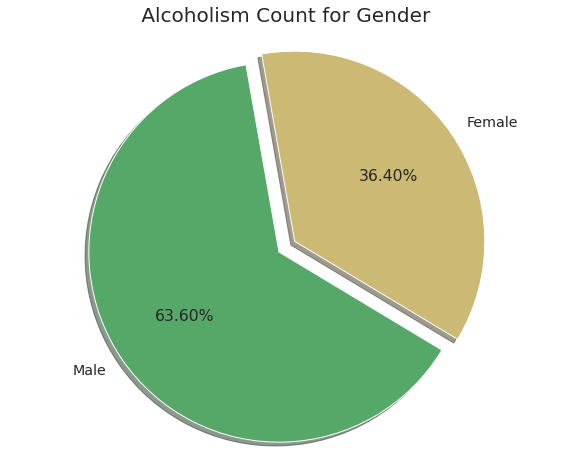

In [ ]:
plt.pie(Alcoholism['Gender'].value_counts(),labels = ['Male','Female'],
        shadow= True, autopct='%.2f%%', colors =['g','y'], explode = [0.1,0],startangle=100)
plt.title(' Alcoholism Count for Gender ',size = 20)
plt.axis ('equal')
plt.show()


**Conclusions :** Most of Alcoholism are Males 

### How Many Waiting Days for Appointments  in the Most ? 

In [ ]:
df['Waiting_Days'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: Waiting_Days, Length: 129, dtype: int64

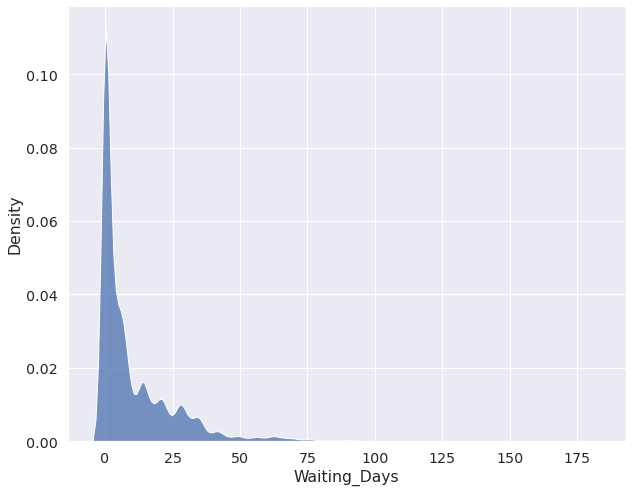

In [ ]:
sns.kdeplot(x= df['Waiting_Days'],shade=True,multiple='stack')

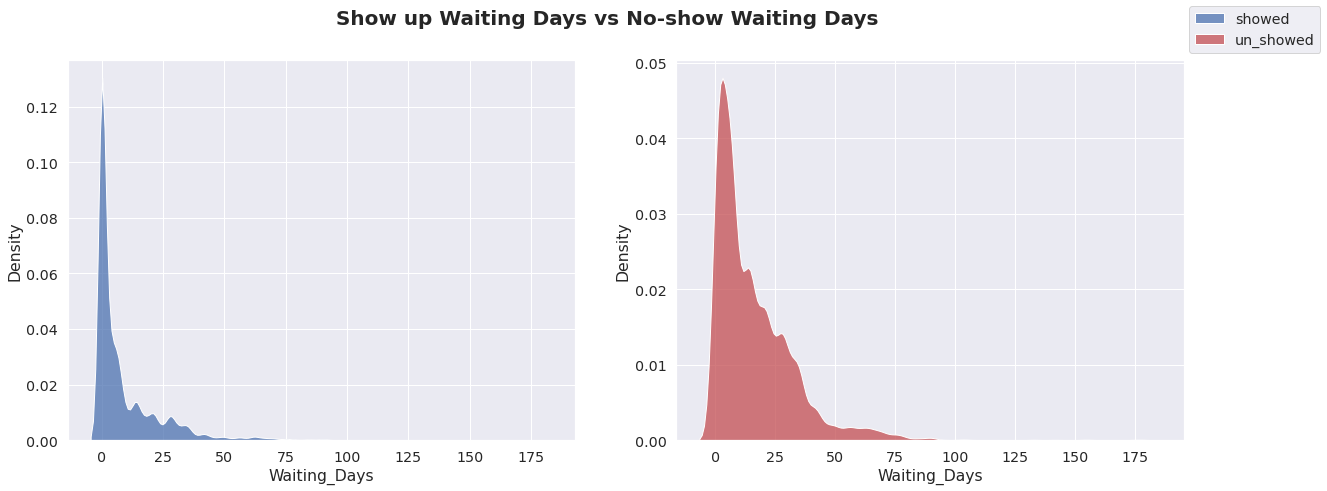

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Show up Waiting Days vs No-show Waiting Days',fontsize=20,fontweight='bold')
sns.kdeplot(ax=axes [0], data=showed['Waiting_Days'],color='b',shade=True,multiple='stack',label = 'showed')
sns.kdeplot(ax=axes [1], data=un_showed['Waiting_Days'],color='r',shade=True,multiple='stack',label = 'un_showed')
fig.legend()

**Conclusions :**
1. Commen Waiting Days for Patients is from 0 to 25 days
2. Patients who showup waits from 0 to 30 days
3. Patients who no-show waits from 0 to 65 days

### What is Average of Waiting Days for Patients with Chronic Diseases  ?

#### Diabetes

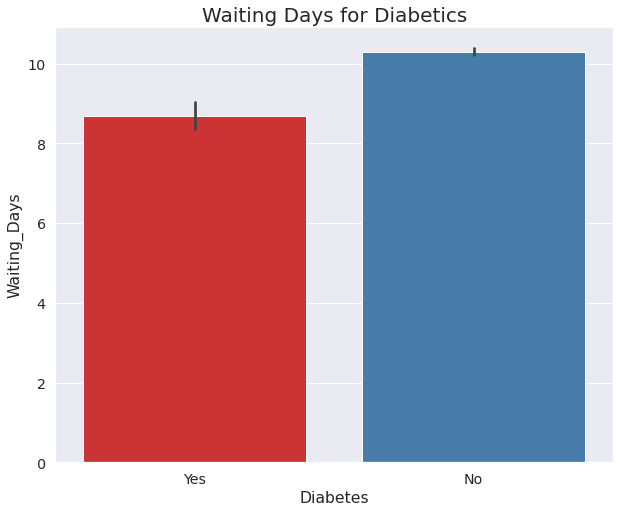

In [ ]:
sns.barplot(x=df['Diabetes'],y=df['Waiting_Days'],order=['Yes','No'],palette='Set1')
plt.title('Waiting Days for Diabetics',size = 20)
plt.show()

#### Hipertension

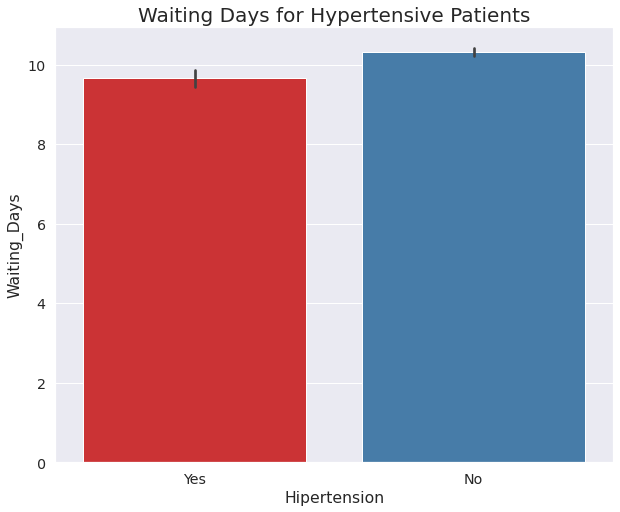

In [ ]:
sns.barplot(x=df['Hipertension'],y =df['Waiting_Days'],order=['Yes','No'],palette='Set1')
plt.title('Waiting Days for Hypertensive Patients',size = 20)
plt.show()

**Conclusions :** Average of waiting days for Diabetics and Hypertensive Patients are less than Non-Diabetics and Non-Hypertensive Patients

### Are Patients with Scholarship eager to Show up to Appointments  ?


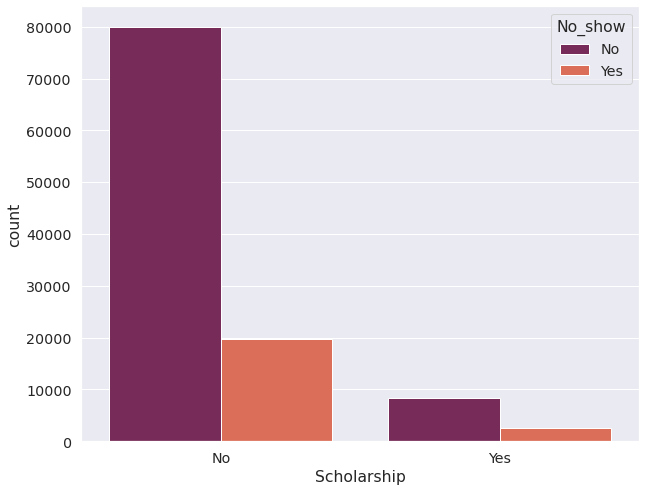

In [ ]:
sns.countplot(x=df['Scholarship'],hue=df['No_show'],palette='rocket')

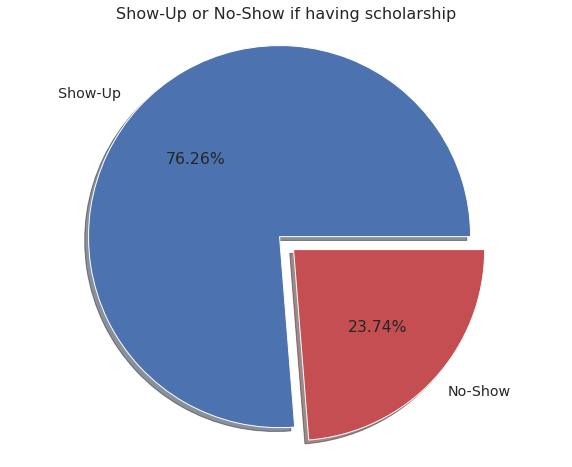

In [ ]:
scholarship = df[df['Scholarship'] == 'Yes']
plt.pie(scholarship['No_show'].value_counts(),labels=['Show-Up ' ,'No-Show'],
        shadow= True, autopct='%.2f%%', colors =['b','r'], explode = [0.1,0])
plt.title('Show-Up or No-Show if having scholarship',size = 16)
plt.axis ('equal')
plt.show()

**Conclusions :**
1. Most of Patients Don't have Scholarship
2. Patients having Scholarship 76.26 % of them are been shown up to appointments 

### Is there Relation between Receiving SMS and Showing up to Appointments ?

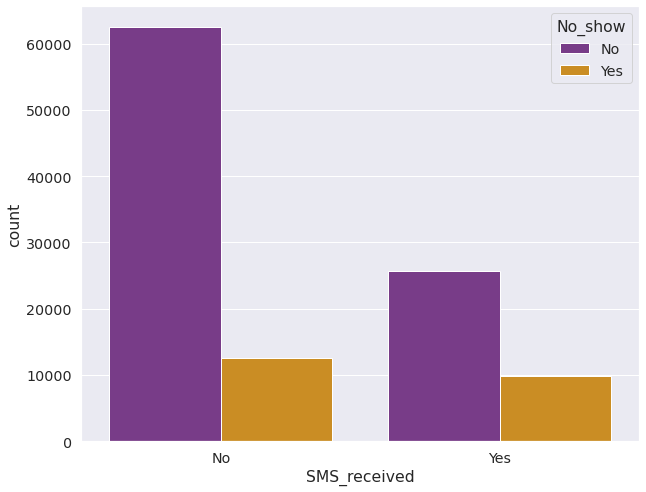

In [ ]:
sns.countplot(x=df['SMS_received'],hue=df['No_show'],palette='CMRmap')

**Conclusions :**
There is no relation between receiving SMS and showing up to appointments as most of shown up don't receiving SMS


### What is Age of Patients who Shown up to Appointments ?


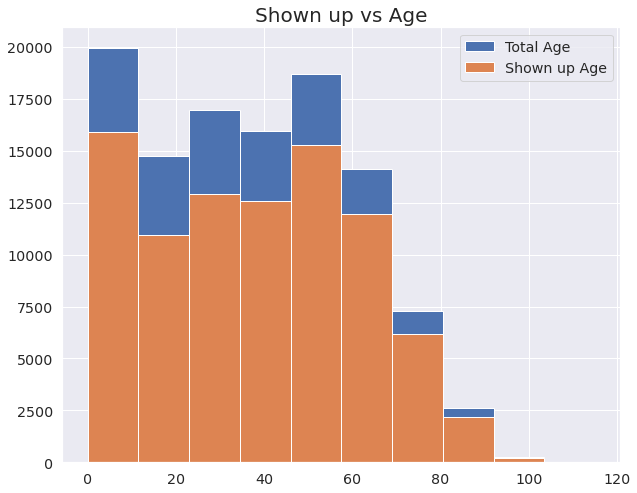

In [ ]:
plt.hist(x=df['Age'],bins=10)
plt.hist(x=showed['Age'],bins=10)
plt.title('Shown up vs Age', fontsize=20)
plt.legend(labels = ['Total Age','Shown up Age'])
plt.show()

**Conclusions :** The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).

### What are the Five Most Neighborhoods where Patients are Shown up to Appointments ?

In [ ]:
showed['Neighbourhood'].value_counts().head()

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: Neighbourhood, dtype: int64

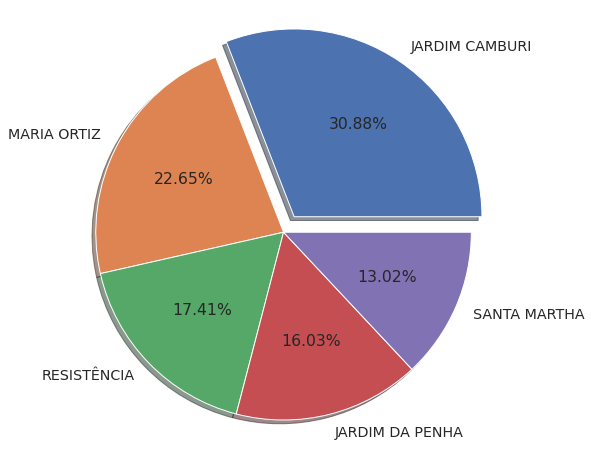

In [ ]:
plt.pie(showed['Neighbourhood'].value_counts().head(),labels=showed['Neighbourhood'].value_counts().head().index,
        shadow= True, autopct='%.2f%%',  explode = [0.1,0,0,0,0])
plt.axis ('equal')
plt.show()

**Conclusions :** The five most neighborhoods where patients are shown up to Appointments 're :
1. JARDIM CAMBURI     
2. MARIA ORTIZ        
3. RESISTÊNCIA        
4. JARDIM DA PENHA    
5. SANTA MARTHA  

## Did Day affect on Showing up to Appointments ?

In [ ]:
df['Appointment_Day_Name'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: Appointment_Day_Name, dtype: int64

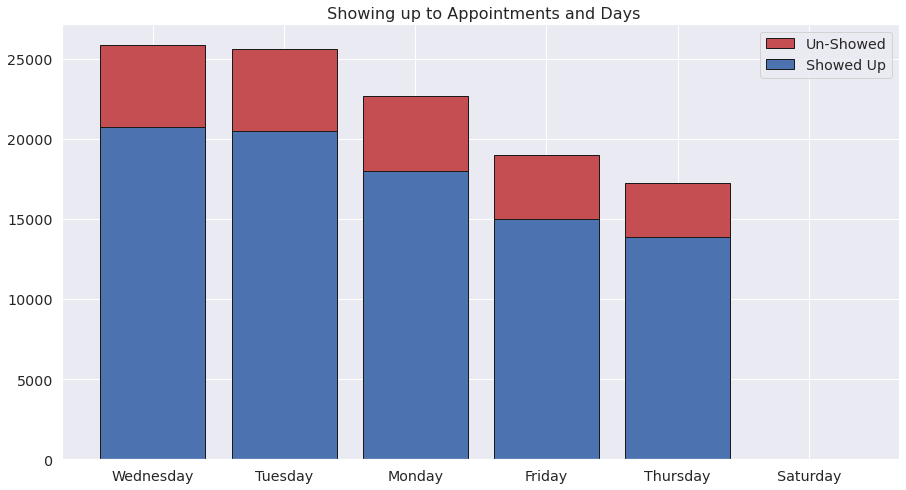

In [ ]:
plt.bar(df['Appointment_Day_Name'].value_counts().index ,df['Appointment_Day_Name'].value_counts(),
        facecolor = 'r',edgecolor='k')
plt.bar(showed['Appointment_Day_Name'].value_counts().index ,showed['Appointment_Day_Name'].value_counts(),
        facecolor = 'b',edgecolor='k')
plt.title(' Showing up to Appointments and Days',size = 16)
plt.legend(['Un-Shown','Shown Up'])
plt.show()

Text(0.5, 1.0, ' Showing up to Appointments and Days')

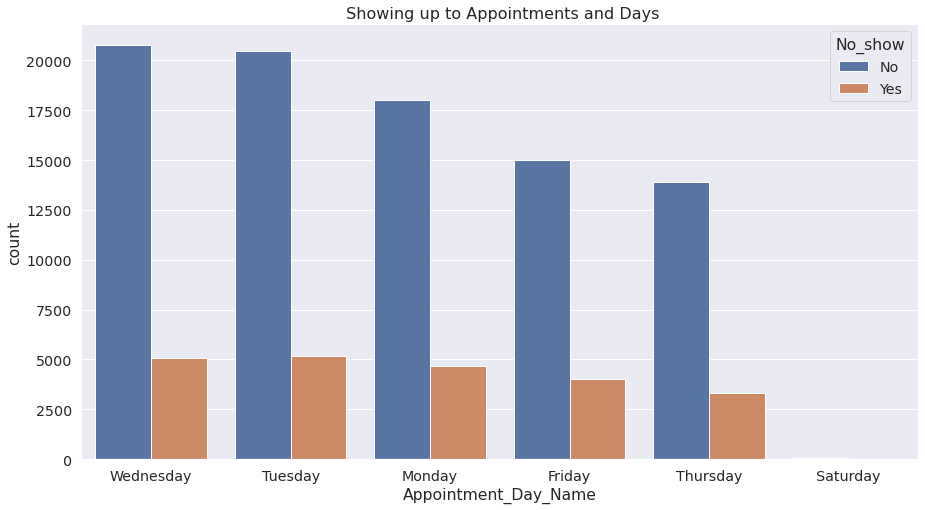

In [ ]:

sns.countplot(x = df['Appointment_Day_Name'],order = df['Appointment_Day_Name'].value_counts().index
              ,hue = df['No_show'])
plt.title(' Showing up to Appointments and Days',size = 16)

**Conclusions :** There are no appointments on Sunday and less appointments  is on Saturday  

<a id='conclusions'></a>
# Conclusions ❤
 1.  Most of patient people has been showed up to appointments
 2.  Patients Females have been shown up to appointments more than Patients Males
 3. The average age of male Diabetics is equal to the average age of female Diabetics
 4. The average age of male Hipertension is equal to the average age of female Hipertension
 5. The average age of male Handicaps is less than to the average age of female Handicaps
 6.  Most of Alcoholism are Males
 7. Commen Waiting Days for Patients is from 0 to 25 days
 8. Patients who showup waits from 0 to 30 days 
 9. Patients who no-show waits from 0 to 65 days
 10. Average of waiting days for Diabetics and Hypertensive Patients are less than Non-Diabetics and Non-Hypertensive Patients
 11. Most of Patients Don't have Scholarship and Patients having Scholarship 76.26 % of them are been shown up to appointments
 12. There is no relation between receiving SMS and showing up to appointments as most of shown up don't receiving SMS
 13. The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60)
 14.  The five most neighborhoods where patients are shown up to Appointments 're : JARDIM CAMBURI , MARIA ORTIZ , RESISTÊNCIA ,JARDIM DA PENHA and SANTA MARTHA
 15. There are no appointments on Sunday and less appointments is on Saturday
